# Chapter 18: Nonlinear Least Squares

## 18.1 Nonlinear equations and least squares 

### 18.1.1 Nonlinear equations 

Consider a set of $m$ possibly nonlinear equations in $n$ unknowns/variables $x = (x_1,\dots,x_n)$, written as 
\begin{align}
f_i(x) = 0, \quad i=1,\dots,m,
\end{align}

where $f_i: \R^n \to \R$ is a scalar-valued function and we want to solve/find x so that all $m$ functions $=0$. 

We can define $f(x) = (f_1(x),\dots,f_m(x))$ is an $m$-vector and $f$ is a function $f: \R^n \to \R^m$. We can rewrite the above equations we want to solve as 
\begin{align}
f(x) = 0
\end{align}

We define the residual as the value of $f(x)$, and we want to find x with associated residual 0. 

### 18.1.2 Nonlinear least squares 

When we can't find a solution, we seek an approximate solution by finding $x$ that minimizes the sum of squares of the residuals, which can be interpreted as finding a solution of the $\textit{nonlinear least squares problem}$ 

\begin{align}
\text{minimize} \quad ||f(x)||^2
\end{align}

### 18.1.3 Optimality condition 

To minimize the sum of squares of the residuals, the partial derivative of $||f(x)||^2$ with respect to each component of $x$ must vanish at $\hat x$: 

\begin{align}
\frac{\partial}{\partial x_i} ||f(\hat x)||^2 = 0, \quad i = 1, \dots, n, 
\end{align}

in vector form, this is equivalent to $\nabla ||f(\hat x)||^2 = 0$, which can be expressed as: 

\begin{align}
    \nabla ||f(\hat x)||^2 = \nabla (\sum_{i=1}^m f_i(x)^2) = 2 \sum_{i=1}^m f_i(x) \nabla f_i(x) = 2Df(x)^Tf(x),
\end{align}

So $\hat x$ must satisfy 

\begin{align}
    2Df(\hat x)^Tf(\hat x) = 0.  
\end{align}

This $\textit{optimality condition}$ must hold for any solution of the nonlinear least squares problem, *but* it can also hold for other points that are not solution. Therefore, it is a *necessary condition* for optimality but it is not a *sufficient condition*. 

### 18.1.5 Examples 

1) **Computing equilibrium points.** Typically, $m=n$, i.e. the system of nonlinear equations is square.
    -  *Equilibrium prices.*: $n$ commodities/goods with prices $p$ ($n$-vector). Demand for $n$ goods given by $D(p)$. Supply given by $S(p)$. Finding a set of equilibrium prices is the same as solving the square set of nonlinear equations 
\begin{align}
    f(p) = S(p) - D(p) = 0
\end{align}
    - *Chemical equilibrium*: $n$ chemical species in a solution. $n$-vector $c$ denotes the concentrations of the species. Chemical reactions consume species (reactants) and generate specieis (products), and the rate of each reaction are functions of the concentration of the reacants and products. $C(c)$ is a vector of the total consumption of $n$ reactants, over all the reactions, and $G(c)$ is the vector of generation of the reactants over all reactions. Computing the set of equilibirum concentrations is the same as solving the square set of nonlinear equations 
\begin{align}
    f(c) = C(c) - G(c) = 0
\end{align}
    - *Mechanical equilibrium.* A mechanical system in 3D with N nodes -- $q$ is a $3N$-vector of the stacked node positions, called the *generalized position*. The net force on each node is a 3-vector and can be described as a $3N$-vector of forces, $F(q)$. The system is in mechanical equilibrium if $F(q) = 0$. 
    - *Nash equilibrium.*  
        -   There are $n$ competing agents or participants that choose a number $x_i$. Each agent is given a (numerical) reward dependent on the choice of number from all other agents. The reward for agent $i$ is given by the function $R_i(x)$, called the payoff function. Each agent wishes to maximize the reward. 
        - A *Nash equilibrium* is a set of choices given by $x$ where no agent can improve their reward by changing their choice. Such a choice is argued to be 'stable' since no agent is incented to change their choice. At a Nash equilibrium $x_i$ maximizes $R_i(x)$, so we must have 
\begin{align}
    \frac{\partial R_i}{\partial x_i}(x) = 0, \quad i = 1,\dots,n. 
\end{align}
        - This condition for a Nash equilibrium is a square set of non linear equations. 
2) **Nonlinear least squares examples** 
    - *Location from range measurements.* $x$ vector represents the location of some object or target which we wish to determine or guess. We are given $m$ *range measurements, i.e.* the (noisy) distance from $x$ to known locations $a_1, \dots, a_m$, 
\begin{align}
    \rho_i = ||x-a_i|| + v_i, \quad i=1,\dots,m,
\end{align}
    - where $v_i$ is an unknown measurement error (assume small.) Our estimate $\hat x$ of the location is found by minimizing the sum squares of the range residuals (our system of nonlinear equations),
\begin{align}
    \sum_{i=1}^m (||x-a_i|| - \rho_i)^2.
\end{align}
    - *Nonlinear model fitting* We consider a model $y \approx \hat f(x;\theta) where $x$ is a feture vector, $y$ is a scalar outcome, and $\hat f$ is a model of some function relating $x$ and $y$, and $\theta$ is a vector of model parameters that we seek. To find $\theta$, we minimize the sum of squares of the residuals over a data set with $N$ examples, 
\begin{align}
    \sum_{i=1}^N (\hat f(x^{(i)}; \theta) - y^(i))^2.
\end{align}
    - If the function model $\hat f$ is linear, this problem we've encountered before and solve with least squares. The nonlinear $\hat f$ is a nonlinear least squares problem. 


## 18.2 Gauss-Newton algorithm 

The Gauss-Newton algoirthm is an iterative that generates a sequence of points $x^{(1)}, x^{(2)}, \dots$. The vector $x^{(1)}$ is called the $\textit{starting point}$ of the algorithm and $x^{(k)}$ is the $k \text{th} \textit{ iterate}$. We judge the iterates by the norm of the associated residuals, $||f(x^{(k)})||$ or its square. The algorithm is terminated when $||f(x^{(k)})||$ is small enough, or $x^{(k+1)}$ is very near or = to $x^{(k)}$, or when a max number of iterations is reached. 

### 18.2.1 Basic Gauss-Newton algorithm 

Idea: alternate btween an affine approximation of $f$ at current iterate, solve the associated linear least squares to find the next iterate. 

At each iteration $k$, we form the affine approximation $\hat f$ of $f$ at the current iterate $x^{(k)}$, given by the Taylor approximation 

\begin{align}
    \hat f(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x-x^{(k)}),
\end{align}

This is a good approximation of $f(x)$ provided $x$ is near $x^{(k)}$. 

The next iterate $x^{(k+1)}$ is then taken to be the minimizer of $||\hat f(x; x^{(k)})||^2$. Assuming the the derivative matrix $Df(x^{(k)})$ has linearly independent columns (which req. $m \geq n$), we have: 

\begin{align}
    x^{(k+1)} = x^{(k)} - (Df(x^{(k)})^T Df(x^{(k)}))^{-1}Df(x^{(k)})f(x^{(k)}).
\end{align}

This iteration gives the basic Gauss-Newton algorithm 

**Algorithm 18.1**: BASIC GAUSS-NEWTON ALGORITHM FOR NONLINEAR LEAST SQUARES

$\textbf{given} \text{ a differentiable function } f:\R^n \to \R^m, \text{an initial point } x^{(1)}.$\
$\text{For } k = 1,2,\dots,k^{max}$
1. $\textit{Form affine approximation at current iterate using calculus. } \text{Evaluate the Jacobian } Df(x^{(k)}) \text{ and define}$
\begin{align}
    \hat f(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x-x^{(k)}).
\end{align}
2. $\textit{Update iterate using linear least squares.} \quad \text{Set } x^{(k+1)} \text{ as the minimizer of } ||\hat f(x; x^{(k)})||^2,$
\begin{align}
    x^{(k+1)} = x^{(k)} - (Df(x^{(k)})^T Df(x^{(k)}))^{-1}Df(x^{(k)})f(x^{(k)}).
\end{align}

The Gauss-Newton algorithm is terminated early if any of the above mentioned criterion for iterative algorithms is met. \
*Note:* The condition $ x^{(k+1)} = x^{(k)}$ holds when 
\begin{align}
    x^{(k+1)} = x^{(k)} - (Df(x^{(k)})^T Df(x^{(k)}))^{-1}Df(x^{(k)})f(x^{(k)}) \\ 
    (Df(x^{(k)})^T Df(x^{(k)}))^{-1}Df(x^{(k)})f(x^{(k)}) = x^{(k+1)} - x^{(k)} \\ 
    (Df(x^{(k)})^T Df(x^{(k)}))^{-1}Df(x^{(k)})f(x^{(k)}) = 0 \\ 
\end{align}

which occurs if and only if $Df(x^{(k)})f(x^{(k)}) = 0$, so the algorithm stops when the optimality condition holds. 

In our algorithm, we can observe that at each iteration, the norm of the $\textit{residual of the approximation}$ goes down in each iteration. However, this is *not* the same as the norm of the $\textit{residual}$.

**Shortcomings of the basic Gauss-Newton algorithm.** 
1) it can fail producing a sequence of points with the norm of the residual increasing to learn values, instead of decreasing to a small value. This is because of the point mentioned above that the residual of the approximation is not equivalent to the residual. The approximation is only close to the residual when $x$ is near $x^{(k)}$, so when they are not close, the approximation can be very different from the residual. 
2) We must assume that hte columns of the derivative matrix $Df(x^{(k)})$ are linearly independent. In some application, this assumption never holds, and in others, it can fail to hold at some iterate and the algorithm stops because the next iteration is not defined. 

In [50]:
function gauss_newton(f, Df, x1; kmax=10)
    x = x1 
    for k=1:kmax
        x -= Df(x) \ f(x)
    end
    return x
end;

### 18.2.2 Newton algorithm

For the special case $m=n$, the Gauss-Newton algorithm reduces to the Newton algorithm (aka Newton-Raphson algorithm), which solves a set of $n$ non linear equations in $n$ variables. 

When $m=n$, the matrix $Df(x^{(k)})$ is square, so the basic Gauss-Newton update can be simplified to
\begin{align}
    x^{(k+1)} &= x^{(k)} - (Df(x^{(k)})^T Df(x^{(k)}))^{-1}Df(x^{(k)})f(x^{(k)}) \\
              &= x^{(k)} - (Df(x^{(k)}))^{-1}f(x^{(k)}).
\end{align}

This iteration gives the Newton algorithm.

**Example: Newton algorithm for** $n = 1$. The iteration is

\begin{align}
    \hat f(x; x^{(k)}) = f(x^{(k)}) + f^{\prime}(x^{(k)})(x-x^{(k)})\\
    0 = f(x^{(k)}) + f^{\prime}(x^{(k)})(x-x^{(k)})\\
    -\frac{f(x^{(k)})}{f^{\prime}(x^{(k)})} = (x-x^{(k)}) \\
    x^{(k)}-\frac{f(x^{(k)})}{f^{\prime}(x^{(k)})} = x \\
    x^{(k+1)} = x^{(k)} - f(x^{(k)}) / f^{\prime}(x^{(k)}) 
\end{align}

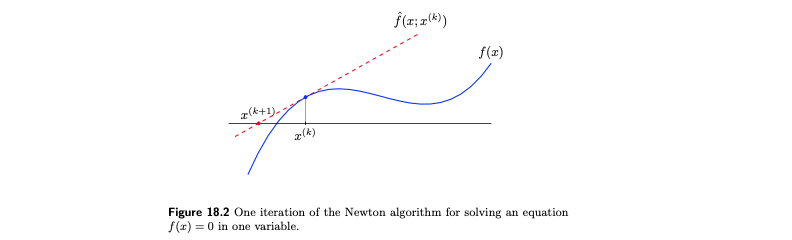

In [42]:
# same logic as gauss-newton, 
# but we terminate early if residual is small enough 
# and returning the residuals at each iteration 

using VMLS
using LinearAlgebra

function newton(f, Df, x1; kmax = 20, tol = 1e-6)
    x = x1 
    fnorms = zeros(0,1) # empty but allows to append iteratively 
    for k=1:kmax
        fk = f(x)
        fnorms = [fnorms; norm(fk)]
        if(norm(fk) < tol)
            break
        end;
        x -= Df(x) \ f(x)
    end
    return x, fnorms
end;

**Example for Newton algorithm n=1.**

The function ($\textit{sigmoid function}$)

\begin{align}
    f(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
\end{align}

has a unique zero at the origin (only one solution of $f(x)=0$ at $x=0$).

Shown below, we can see that Newton iteration starting at $x^{(1)} = 0.95$ convergers to solution $x = 0$, but with $x^{(1)} = 1.15$, it diverges.

In [66]:
# define sigmoid function
sigmoid(x) = (exp.(x) - exp.(-x))/(exp.(x) + exp.(-x))
sigmoid(0), sigmoid(1), sigmoid(-1)

(0.0, 0.7615941559557649, -0.7615941559557649)

In [67]:
# define the derivative of sigmoid 
sigprime(x) =  4 ./ (exp.(x) + exp.(-x)).^2
sigprime(0), sigprime(1), sigprime(-1)

(1.0, 0.4199743416140261, 0.4199743416140261)

In [68]:
# start point at .95
x1 = .95
xhat, fnorms = newton(sigmoid, sigprime, x1)
xhat, sigmoid(xhat)

(4.345197431622483e-7, 4.3451974318649333e-7)

In [46]:
fnorms

5×1 Matrix{Float64}:
 0.7397830512740042
 0.5941663642651943
 0.230111245500342
 0.00867002864500564
 4.3451974318649333e-7

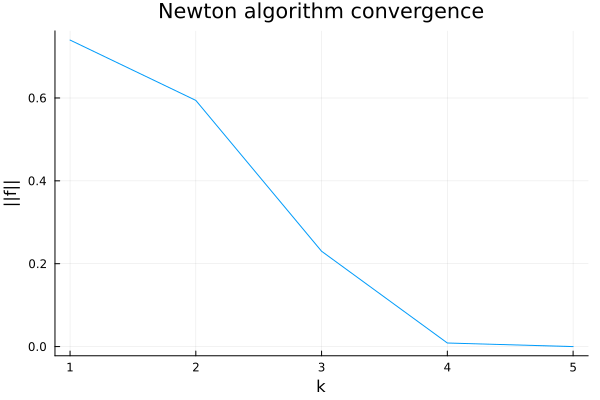

In [47]:
# plot fnorms 
using Plots
plot(1:length(fnorms), fnorms, xlabel="k", ylabel="||f||", legend=false, title="Newton algorithm convergence")

In [48]:
# start point at 1.15, diverges
x1 = 1.15
xhat, fnorms = newton(sigmoid, sigprime, x1)
xhat, sigmoid(xhat)

(NaN, NaN)

In [49]:
fnorms

20×1 Matrix{Float64}:
   0.8177540779702877
   0.8664056534177533
   0.9735568532451107
   0.9999999999999906
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

## 18.3 Levenberg-Marquardt algorithm 
An extension of the basic Gauss-newton algorithm addressing the shortcomings mentioned above. 

**Multi-objective update formulation.**  In choosing $x^{(k+1)}$, we have *two* objectives: We would like $||\hat f(x;x^{(k)})||^2$ to be small and we would also like $||x-x^{(k)}||^2$ small. The first objective, like in the basic Gauss-Newton, is an approximation we really want to minimize; the second objective expresses the idea that we should not move so far that we cannot trust the approximation. We should choose $x^{(k+1)}$ as the minimizer of 

\begin{align}
    ||\hat f(x;x^{(k)})||^2 + \lambda ||x-x^{(k)}||^2. 
\end{align}

where $\lambda$ is a positive parameter that can take different values in different iterations, denoted by a iteration superscript $\lambda ^{(k)}$. The second term, $||x-x^{(k)}||^2$, is sometimes called a *trust penalty* term, since it penalizes choices of $x$ that are far from $x^{(k)}$, where we cnnot trust the affine approximation. Then, $\lambda ^{(k)}$ is sometimes called the *trust parameter*. 

Computing the minimizer of the above equation is a multi-objective least squares or regularized least squares problem, equivalent to minimizing objective function $J = $

\begin{align}
    \left\lVert \begin{bmatrix} Df(x^{(k)}) \\ \sqrt{\lambda ^{(k)}}I \end{bmatrix} x +
    \begin{bmatrix} Df(x^{(k)})x^{(k)} - f(x^{(k)}) \\ \sqrt{\lambda ^{(k)}}x^{(k)} \end{bmatrix} \right\rVert ^2. 
\end{align}

This can be rewritten as minimizing $J = ||\tilde A x + \tilde b||^2$, where $\tilde A$ and $\tilde b$ are

\begin{align}
    \tilde A = \begin{bmatrix} Df(x^{(k)}) \\ \sqrt{\lambda ^{(k)}}I \end{bmatrix}, \quad
    \tilde b = \begin{bmatrix} Df(x^{(k)})x^{(k)} - f(x^{(k)}) \\ \sqrt{\lambda ^{(k)}}x^{(k)} \end{bmatrix}. 
\end{align}

Since $\lambda ^{(k)}$ is positive, the stacked matrix in this least squares problem has linearly independent columns, even when $Df(x^{(k)})$ does not. The solution for $\hat x = x^{(k+1)}$ follows that the solution of the least squares problem. From the normal equations of the least squares problem we can derive a useful expression for $x^{(k+1)}$: 

Normal equations of least squares problems are as follows: 
\begin{align}
    (\tilde A^T \tilde A) \hat x &= \tilde A^T \tilde b \\
    (\lambda_1 A_1^T A_1 + \dots + \lambda_k A_k^T A_k) \hat x &= (\lambda_1 A_1^T b_1 + \dots + \lambda_k A_k^T b_k)
\end{align}

In our case, because we are minimizing two objectives, we have 2 sets of $\lambda$, $A$, and $b$: 

\begin{align}
    \lambda_1 = 1, \quad A_1 = Df(x^{(k)}), \quad b_1  = Df(x^{(k)})x^{(k)} - f(x^{(k)}),\\
    \lambda_2 = \lambda^{(k)}, \quad A_2 = I, \quad b_2  = x^{(k)}.
\end{align}

We can rewrite the equations of least squares for our minimization problem as such: 

\begin{align}
    (\lambda_1 A_1^T A_1 + \dots + \lambda_k A_k^T A_k) \hat x &= (\lambda_1 A_1^T b_1 + \dots + \lambda_k A_k^T b_k)\\
    (A_1^T A_1 + \lambda^{(k)} I^T I) \hat x &= (A_1^T b_1 + \lambda^{(k)} I^T x^{(k)}) \\ 
    (A_1^T A_1 + \lambda^{(k)} I) \hat x &= (A_1^T b_1 + \lambda^{(k)} x^{(k)}) \\ 
\end{align}

Plugging our values for $A_1$ and $b_1$, and defining the next iteration of the Levenberg-Marquardt $x^{(k+1)} = \hat x$, we get an expression for $x^{(k+1)}$:

\begin{align}
    (&Df(x^{(k)})^T Df(x^{(k)}) + \lambda^{(k)} I) x^{(k+1)} \\
    &= \quad Df(x^{(k)})^T \big(Df(x^{(k)})x^{(k)} - f(x^{(k)})\big) + \lambda^{(k)} x^{(k)} \\ 
    &= \quad (Df(x^{(k)})^T Df(x^{(k)}) + \lambda^{(k)} I) x^{(k)} - Df(x^{(k)})^T f(x^{(k)})
\end{align}

and therefore, 
\begin{align}
    x^{(k+1)} = x^{(k)} - (Df(x^{(k)})^T Df(x^{(k)}) + \lambda^{(k)} I)^{-1} Df(x^{(k)})^T f(x^{(k)}).
\end{align}

From the above equation, we see that $x^{(k+1)} = x^{(k)}$ only if $2Df(x^{(k)})^T f(x^{(k)}) = 0$, i.e. only when the optimality condition holds for $x^{(k)}$. Similar to the Gauss-Newton algorithm, the Levenberg-Marquardt algorithm stops only (not early) when the optimality condition holds. 

**Updating the trust paramter.** Several algorithms can be used to adjust $\lambda$. One method forms $x^{(k+1)}$ using the current value of $\lambda$ and checks if the objective has decreased. If it has, we accept the new point and decrease $\lambda$ a bit for the next iteration. If the objective has not decreased, which means $\lambda$ is too small, we do not update the point $x^{(k+1)}$, and increase $\lambda$ substantially.

**Levenberg-Marquardt algorithm.** 

**Algorithm 18.3**: $\text{LEVENBERG-MARQUARDT ALGORITHM FOR NONLINEAR LEAST SQUARES}$

$\textbf{given} \text{ a differentiable function } f:\R^n \to \R^m, \text{an initial point } x^{(1)}, \text{an initial trust parameter } \lambda^{(1)} > 0.$ \
$\text{For } k = 1,2,\dots,k^{max}$
1. $\textit{Form affine approximation at current iterate.} \text{Evaluate the Jacobian } Df(x^{(k)}) \text{ and define}$
\begin{align}
    \hat f(x; x^{(k)}) = f(x^{(k)}) + Df(x^{(k)})(x-x^{(k)}).
\end{align}
2. $\textit{Compute tentative iterate.} \quad \text{Set } x^{(k+1)} \text{ as the minimizer of } $
\begin{align}
    ||\hat f(x; x^{(k)})||^2 + \lambda^{(k)} ||x-x^{(k)}||^2.
\end{align}
3. $\textit{Check tentative iterate.}$\
$\text{If } ||f(x^{(k+1)})||^2 < ||f(x^{(k)})||^2, \text{accept iterate and reduce } \lambda: \lambda^{(k+1)} = 0.8\lambda^{(k)}. $\
$\text{Otherwise, increase } \lambda \text{ and do not update } x: \lambda^{(k+1)} = 2\lambda^{(k)} \text{ and } x^{(k+1)} = x^{(k)}. $

In [266]:
using VMLS

function levenberg_marquardt(f, Df, x1, lambda1; kmax=100, tol=1e-6)
    n = length(x1)
    x = x1 
    lambda = lambda1
    objectives = zeros(0,1)
    residuals = zeros(0,1)
    for k=1:kmax
        Df_x = Df(x)
        f_x = f(x)
        obj = norm(f_x)^2
        objectives = [objectives; obj]
        # if obj < tol 
        #     break
        # end;
        res = norm(2*Df_x'*f_x)
        residuals = [residuals; res]
        if res < tol
            break
        end;
        Atilde = [Df_x ; sqrt(lambda) * eye(n)]
        #btilde = [Df_x*x - f_x ; sqrt(lambda) * x]
        btilde = [f_x; zeros(n)]
        x_new = x - Atilde \ btilde
        if norm(f(x_new)) < norm(f_x)
            x = x_new
            lambda *= .8
        else 
            lambda *= 2.0
        end
    end
    return x, Dict([("objectives", objectives), ("residuals", residuals)])
end;

#### Variations / Addendums to Levenberg-Marquardt algorithm

**Stopping criteria.** We stop early when either of the two conditions hold: 
- *Small residual:* If $||f(x^{(k+1)})||^2$ is small enough, this means we have (almost) solved the equations $f(x) = 0$ and therefore (almost) minimized $||f(x)||^2$. 
- *Small optimality condition residual:* If $||2Df(\hat x)^Tf(\hat x)||$ is small enough, the optimality condition almost holds. 

When the algorithm stops with the small residual, we know we have solved the equations (or that the objective is small enough), but when the algorithm terminates with small optimality condition resdiual, we can't say for sure about the point $x^{(k+1)}$ computed and if it is a minimizer of $||f(x)||^2$ or not. 

**Warm start**. In many applications there can be a sequence of similar or related nonlinear least squares problems that need to be solved and in these cases, it's common to start the algorithm at the solution of the previously solved problem.

**Multiple runs.** with different starting points and using the best one found with the smallest residual. 

**Complexity.** Step 1) Complexity of evaluating $Df$ depends on the function $f$. 2) regularized least squares problem is $2(m+n)n^2$ flops.

**Levenberg-Marquadt update for** $n = 1$. 

\begin{align}
    x^{(k+1)} = x^{(k)} - \frac{f'(x^{(k)})}{\lambda^{(k)} + (f'(x^{(k)}))^2} f(x^{(k)}).
\end{align}

### 18.3.1 Examples 

**Nonlinear equation.** the first example is the sigmoid function from the previous section. The Gauss-Newton method diverges when the initial value is $x^{(1)} = 1.15$ The Levenberg-Marquardt algorith, however, solves this problem and converges to the solution $x = 0$ in around 10 iterations. 

In [267]:
x, iterdata = levenberg_marquardt(sigmoid, sigprime, [1.15], 1.0)
x

1×1 Matrix{Float64}:
 3.5980086920074173e-7

In [268]:
iterdata["objectives"]

12×1 Matrix{Float64}:
 0.6687217320370353
 0.5171794416169399
 0.2654398392902504
 0.05950640111357746
 0.007136093471320708
 0.0006034329647687866
 3.67476510009642e-5
 1.5851530438029975e-6
 4.7639049336325304e-8
 9.833011870547503e-10
 1.376935080411417e-11
 1.2945666548397725e-13

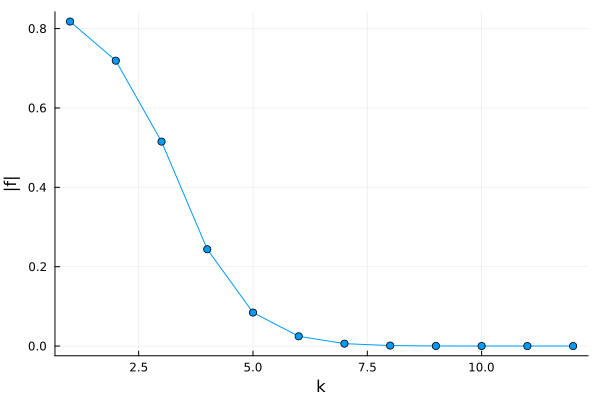

In [269]:
plot(sqrt.(iterdata["objectives"]), shape=:circle, legend=false, xlabel="k", ylabel="|f|")

**Equilibrium prices.** 

\begin{align}
    D(p) = \exp(E^d(\log p - \log p^{nom}) + d^{nom}),\\
    S(p) = \exp(E^s(\log p - \log p^{nom}) + s^{nom}),
\end{align}

- $E^d$ and $E^s$ are demand and supply elasticity matrices
- $d^{nom}$ and $s^{nom}$ are nominal demand and supply vectors 

\begin{align}
    p^{nom} = (2.8, 10), \quad d^{nom} &= (3.1, 2.2), \quad s^{nom} = (2.2, 0.3)\\

    E^d = \begin{bmatrix} -0.5 & 0.2 \\ 0 & -0.5 \end{bmatrix}, &\quad E^s = \begin{bmatrix} 0.5 & -0.3 \\ -0.15 & 0.8 \end{bmatrix}  .
\end{align}


In [275]:
pnom = [2.8, 10]
dnom = [3.1, 2.2]
snom = [2.2, 0.3]

Ed = [-0.5   0.2;
      -0.0 -0.5]

Es = [  .5 -.3;
      -.15  .8]

D(p) = exp.(Ed*(log.(p) - log.(pnom)) .+ dnom)
S(p) = exp.(Es*(log.(p) - log.(pnom)) .+ snom)

f(p) = S(p) - D(p)

function Df(p)
    Sp = S(p)
    Dp = D(p)
    DSp = [(Sp[1]*Es[1,1]/p[1]) (Sp[1]*Es[1,2]/p[2]);
           (Sp[2]*Es[2,1]/p[1]) (Sp[2]*Es[2,2]/p[2])];
    DDp = [(Dp[1]*Ed[1,1]/p[1]) (Dp[1]*Ed[1,2]/p[2]);
           (Dp[2]*Ed[2,1]/p[1]) (Dp[2]*Ed[2,2]/p[2])];
    return DSp - DDp; 
end;

p, iterdata = levenberg_marquardt(f, Df, [3,9], 1.0)
p


2-element Vector{Float64}:
 15.803500389135634
 52.65752717737608

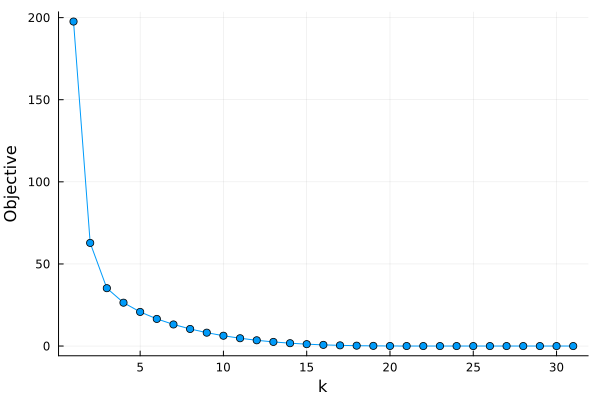

In [276]:
plot(iterdata["objectives"], shape = :circle, legend =false, xlabel = "k", ylabel = "Objective")

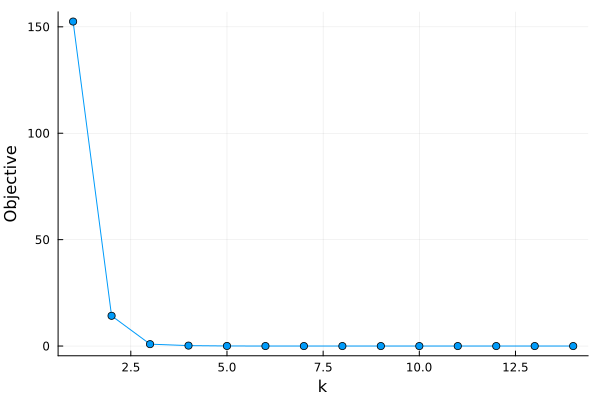

In [278]:
pnom = [1,1]
p, iterdata = levenberg_marquardt(f, Df, [3,9], 1.0)
plot(iterdata["objectives"], shape = :circle, legend =false, xlabel = "k", ylabel = "Objective")


In [279]:
p

2-element Vector{Float64}:
 5.644108533416071
 5.265754930531486

**Location from range measurements.**  

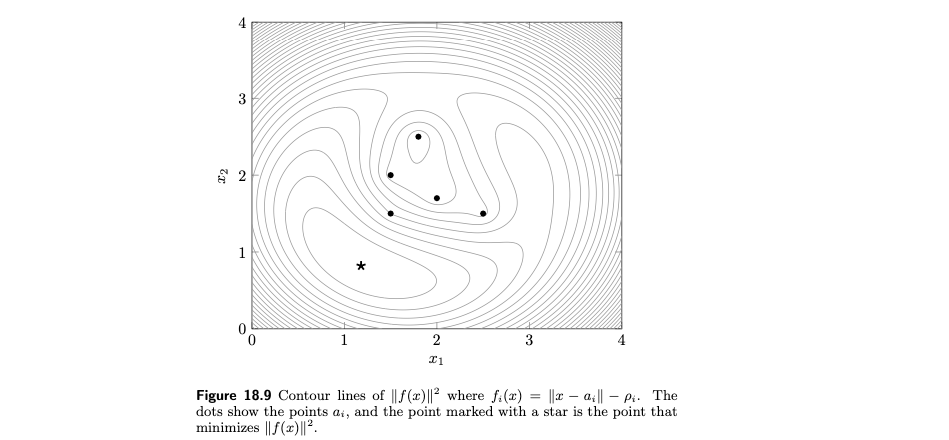

- 5 points $a_i$ in a plane. 
- range measurements $p_i$ are distances of these points to the "true" point $(1,1)$ plus measurement errors.  
- the point $(1.18, 0.82)$ (marked with a star) minimizes $||f(x)||^2$

We run the algorithm from three different starting points, 
\begin{align}
x^{(1)} = (1.8, 3.5), \quad x^{(1)} = (2.2, 3.5), \quad x^{(1)} = (3.0, 1.5),
\end{align}

with $\lambda^{(1)} = 0.1.$ 

In [296]:
m = 5 # five points 

A = [1.8 2.5;
     2.0 1.7;
     1.5 1.5;
     1.5 2.0;
     2.5 1.5]; # all sensor locations (ai) from i = 1,..,5 

rhos = [ 1.87288, 1.23950, 0.53672, 1.29273, 1.49353 ]; # measurements 

dist(x) =  [norm(x-a) for a in eachrow(A)]
f(x) = dist(x) - rhos
#Df(x) = diagm(1.0 ./dist(x)) * [x-a for a in eachrow(A)]
Df(x) = diagm(1.0 ./dist(x)) * [ (x[1] .- A[:,1]) (x[2] .- A[:,2]) ];

In [298]:
f([0,0])

5-element Vector{Float64}:
 1.2077043601498725
 1.3853809496813372
 1.5846003435596425
 1.20727
 1.4219459474226503

[1.1824859803827907, 0.8242289367900364]
[2.9852664103617954, 2.1215768036188956]
[1.182485794243582, 0.8242289466379733]


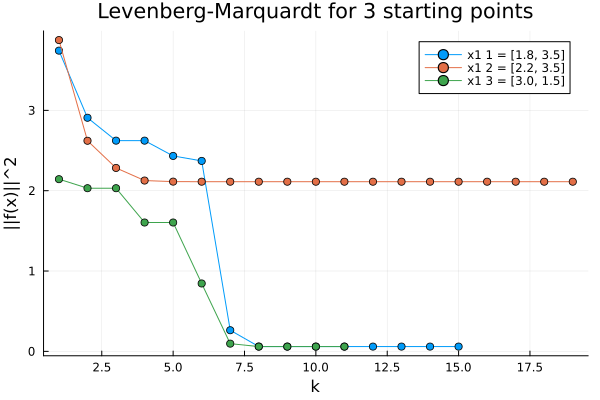

In [177]:
x1s = [[1.8,3.5],[2.2,3.5],[3.0,1.5]]
lambda1 = .1;

for k=1:length(x1s)
    x, iterdata = levenberg_marquardt(f, Df, x1s[k], lambda1)
    println(x)
    plot!(iterdata["objectives"], shape = :circle, label="x1 $k = "*string(x1s[k]), legend=true)
end;

plot!(xlabel = "k", ylabel = "||f(x)||^2", title="Levenberg-Marquardt for 3 starting points")

## 18.4 Nonlinear model fitting 

In linear model fitting, $\hat f(x; \theta)$ is a linear function of the parameters, so it has the special form

\begin{align}
    \hat f(x; \theta) = \theta_1 f_1(x) + \cdots + \theta_p f_p(x),
\end{align}

where $f_1,\dots,f_p$ are the scalar-valued functions, called the basis functions. 

In nonlinear model fitting the dependence of $\hat f(x; \theta)$ on $\theta$ is not linear (or affine), so it does not have the simple form of a linear combination on $p$ basis functions. We choose the parameter $\theta$ the same way by minimizing the sum of the squares of the prediction residuals, 

\begin{align}
    \sum_{i = 1}^N (\hat f(x^{(1)}; \theta) - y^{i})^2,
\end{align},

which is a nonlinear least squares problem with variable $\theta$. 

**Example.** The model we fit to is an exponentially decaying sinusoid 

\begin{align}
\hat f(x; \theta) = \theta_1 e^{\theta_2 x} cos(\theta_3 x + \theta_4),
\end{align}

In [252]:
xdata

60-element Vector{Float64}:
  4.827318490198667
  1.7962851735038736
  2.364371967525532
  0.2755934857758857
  1.2101554063489706
  4.234539450989722
  3.6198334064839233
  4.897720035796806
  4.568052424311065
  1.535115752860129
  ⋮
  8.023363774670841
  5.653305388398036
 17.08893025970656
  8.440656395979786
  6.867025881485729
 16.720782613190764
  9.355764996912331
 18.121582562018602
 15.562040214294296

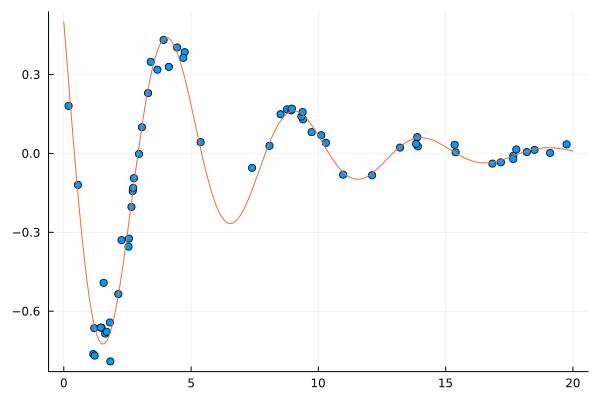

In [280]:
# Use these parameters to generate data. 

data_theta = [1, -.2, 2*pi/5, pi/3];

# 60 points between 0 and 20
M = 30; 
xdata = [5*rand(M); 5 .+ 15*rand(M)];

# Evaluate function at these points 

ydata = data_theta[1] * exp.(data_theta[2] * xdata) .* cos.(data_theta[3]*xdata .+ data_theta[4])

N = length(xdata);
# perturbate data 
ydata = ydata .* (1 .+ .2*randn(N)) .+ .015 * randn(N);

xmodel = linspace(0,20,200)
ymodel = data_theta[1] * exp.(data_theta[2] * xmodel) .* cos.(data_theta[3]*xmodel .+ data_theta[4])

# plot data points 
using Plots 
scatter(xdata, ydata, legend=false)
plot!(xmodel, ymodel)

In [281]:
# run Levenberg-Marquardt with starting point theta = (1,0,1,0) and lambda = 1 

f(theta) = theta[1] * exp.(theta[2] * xdata) .* cos.(theta[3]*xdata .+ theta[4]) - ydata
Df(theta) = hcat([exp.(theta[2] * xdata) .* cos.(theta[3]*xdata .+ theta[4]),
             theta[1] .* cos.(theta[3]*xdata .+ theta[4]) .* (xdata .* exp.(theta[2] * xdata)),
             theta[1] .* exp.(theta[2] * xdata) .* -sin.(theta[3]*xdata .+ theta[4]) .* xdata,
             theta[1] .* exp.(theta[2] * xdata) .* -sin.(theta[3]*xdata .+ theta[4])]...);

Df2(theta) = hcat(
    exp.(theta[2]*xdata) .* cos.(theta[3] * xdata .+ theta[4]),
    theta[1] * ( xdata .* exp.(theta[2]*xdata) .*
    cos.(theta[3] * xdata .+ theta[4])),
    -theta[1] * ( exp.(theta[2]*xdata) .* xdata .*
    sin.(theta[3] * xdata .+ theta[4])),
    -theta[1] * ( exp.(theta[2]*xdata) .*
    sin.(theta[3] * xdata .+ theta[4])) );

theta1 = [1,0,1,0]
lambda1 = 1.0

theta, iterdata = levenberg_marquardt(f, Df, theta1, lambda1)

theta
#iterdata
#norm(Df(data_theta) .- Df2(data_theta))

4-element Vector{Float64}:
  0.9670703637721398
 -0.19797581705441028
  1.2371412406949636
  1.0988360686789536

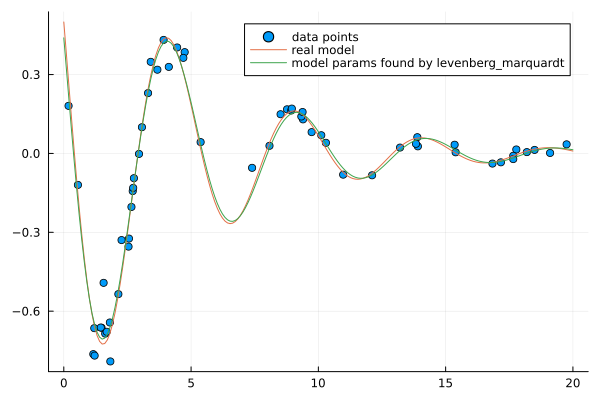

In [283]:
ymodelfit = theta[1] * exp.(theta[2] * xmodel) .* cos.(theta[3]*xmodel .+ theta[4])

using Plots 
scatter(xdata, ydata, label="data points")
plot!(xmodel, ymodel, label="real model")
plot!(xmodel, ymodelfit, label="model params found by levenberg_marquardt")


**Orthogonal distance regression.** Consider the linear in the parameters model 

\begin{align}
    \hat f(x; \theta) = \theta_1 f_1(x) + \cdots + \theta_p f_p(x),
\end{align}

with basis functions $f_i: \R^n \to \R$, and a data set of $N$ pairs $(x^{(i)}, y^{(i)})$

In *orthogonal distance regression, we use another objective, the sum of the squared distances of $N$ points $(x^{(i)}, y^{(i)})$ to the graph of the model $\hat f$, i.e, the set of points of the form $(u, \hat f(u))$ This model can be found by solving the nonlinear least sqaures problem

\begin{align}
    \text{minimize} \quad \sum_{i=1}^N (\hat f(u^{(i)}; \theta) - y^{(i)})^2 + \sum_{i=1}^N ||u^{(i)}-x^{(i)}||^2
\end{align}

with variables $\theta$ and $u$. Because we have variables $u$, we are modifying feature vectors from $x^{(i)}$ to $u^{(i)}$, which is an example of an *error-in-variables model*, since it takes into account errors in the regressors or independent variables. 

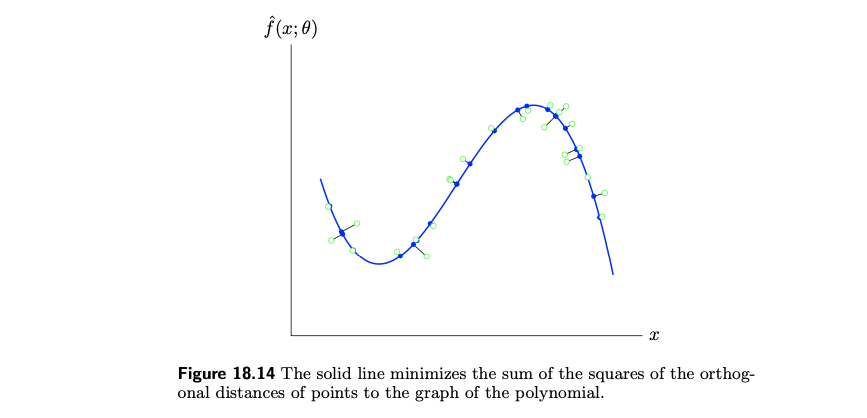

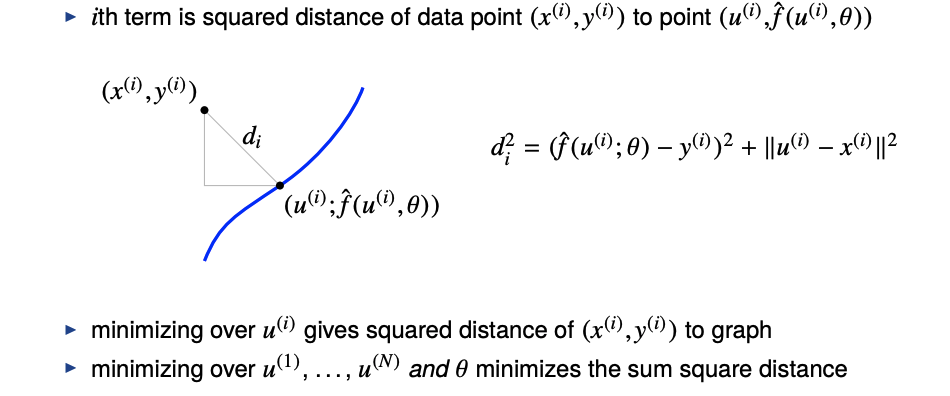

Below, we will use orthogonal distance regression to fit a cubic polynomial 

\begin{align}
    \hat f(x; \theta) = \theta_1 + \theta_2 x + \theta_3 x^2 + \theta_4 x^4
\end{align}

to $N = 25$ data points. 

In [330]:
N = 25

using VMLS
xdata, ydata = orth_dist_reg_data(); 
p = 4; 
theta_leastsquares = vandermonde(xdata, p) \ ydata

4-element Vector{Float64}:
  0.32756079978308056
 -4.392666807341833
 11.04691740038058
 -7.094396433935387

Note: The objective is to minimize the squared norm of the $2N$-vector 

\begin{align}
    \begin{bmatrix}
        \hat f(u^{(1)}; \theta) - y^{(1)} \\ 
        \vdots \\
        \hat f(u^{(N)}; \theta) - y^{(N)} \\ 
        u^{(1)} - x^{(1)} \\
        \vdots \\
        u^{(N)} - x^{(N)} 
    \end{bmatrix}
\end{align}

In [362]:
function f(x)
    theta = x[1:p]
    u = x[p+1:end]
    yhat = vandermonde(u, p) * theta
    deltay = yhat - ydata
    return [deltay; u-xdata];
end;

function Df(x)
    theta = x[1:p]
    u = x[p+1:end]
    A = vandermonde(u, p);
    dfhatdu = (vandermonde(u, p-1) .* collect(1:p-1)') * theta[2:end]
    B = diagm(dfhatdu)
    C = zeros(N , p);
    D = eye(N);
    # println(size(A))
    # println(size(B))
    # println(size(C))
    # println(size(D))
    return [A B; C D]
end;

In [363]:
lambda1 = .01
x1 = [theta_leastsquares; xdata]

x, iterdata = levenberg_marquardt(f, Df, x1, lambda1)

theta_lm = x[1:p]
u_lm = x[p+1:end]

theta_lm

4-element Vector{Float64}:
  0.49640445238722275
 -5.761785405198232
 13.992293131733858
 -8.929827701791316

In [364]:
theta_lm - theta_leastsquares

4-element Vector{Float64}:
  0.1688436526041422
 -1.3691185978563993
  2.945375731353277
 -1.8354312678559292

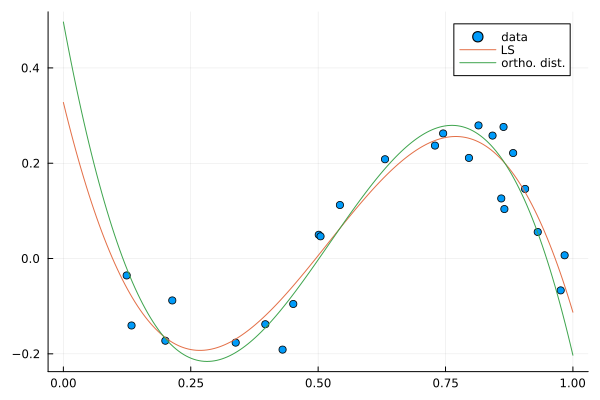

In [366]:
xmodel = linspace(0, 1, 200)
vm = vandermonde(xmodel, p)
y_ls = vm * theta_leastsquares
y_lm = vm * theta_lm

using Plots
scatter(xdata,ydata, label="data")
plot!(xmodel, y_ls, label="LS")
plot!(xmodel, y_lm, label="ortho. dist.")

## 18.5 Nonlinear last squares classification

The Boolean classifier fits a linearly parametrized function 

\begin{align}
\tilde f(x) = \theta_1 f_1(x) + \cdots + \theta_p f_p(x)
\end{align}

to the data points $(x^{(i)}, y^{(i)}), i = 1,\dots,N$ where $y^{(i)} \in \{-1,1\},$ using linear least squares. The parameters $\theta_1, \dots, \theta_p$ are chosen to minimize the sum squares objective 

\begin{align}
    \sum_{i=1}^N (\tilde f(x^{(i)}) - y^{(i)})^2.
\end{align}

We can think of $\tilde f(x)$ as the *continuous* prediction of the Boolean outcome $y$. The classifier itself is given by $\hat f(x) = \textbf{sign}(\tilde f(x));$ 

Instaed of the sum square preduction error for the continuous prediction, consider the sum square prediction error for the Boolean prediction, 

\begin{align}
    \sum_{i=1}^N (\hat f(x^{(i)}) - y^{(i)})^2 =  \sum_{i=1}^N (\textbf{sign}(\tilde f(x)) - y^{(i)})^2.
\end{align}

The objective above is what we really want; the least squares objective is a *surrogate* for what we want. But we cannot use Levenberg-Marquardt algorithm to minimize the wanted objective because the sign function is not differentiable. We replace the sign function with a differentiable approximation like the *sigmoid function*

\begin{align}
    \phi (u) = \frac{e^u - e^{-u}}{e^u + e^{-u}},
\end{align}

We choose $\theta$ by solving the nonlinear least squares problem of minimizing 

\begin{align}
    \sum_{i=1}^N (\phi(\tilde f(x^{(i)})) - y^{(i)})^2.
\end{align}

**Loss function interpretation.** We can interpret the above objective functions in terms of *loss functions*. Each of the three objectives has the form 

\begin{align}
    \sum_{i=1}^N \ell (\tilde f(x^{(i)}), y^{(i)} ),
\end{align}

where $\ell$ is a loss function. The objective functions have the corresponding loss functions $\ell(u,y) = (u-y)^2, (\textbf{sign}(u) - y)^2, (\phi (u) - y)^2.$ Roughly speaking, the loss function $\ell(u,y)$ tells us how bad it is to have $\tilde f(x^{(i)}) = u$ when $y = y^{(i)}$. 

Since for classification the outcome $y$ has only two values, -1 and +1, so we can plot the loss functions as functions of $u$ for these two values of $y$. 

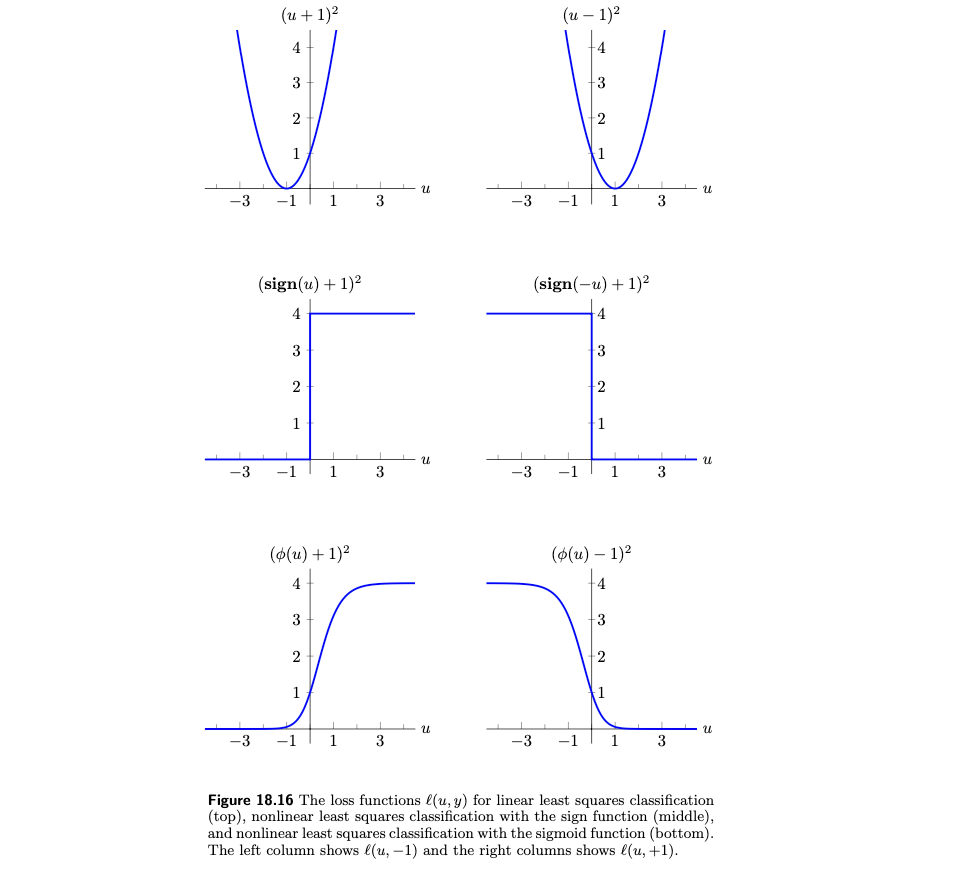

### 18.5.1 Handwritten digit classification 

Consider the Boolean problem of recognizing (classification) the digit zero on the MNIST set of handwritten digits. We use linear features,

\begin{align}
    \tilde f(x) = x^T \beta + v,
\end{align}

where $x$ is the $493$-vector of pixel intensities. To determine the parameters $v$ and $\beta$ we solve nonlinear least squares problem 

\begin{align}
    \sum_{i=1}^N (\phi((x^{(i)})^T\beta +v) -y^{(i)})^2 + \lambda ||\beta||^2, 
\end{align}

which is the classification nonlinear least squares problem we mentioned before with a regularization parameter $\lambda$. 

**Convergence of Levenberg-Marquardt algorithm.** It is typical in nonlinear data fitting problems that well before convergence, the Levenberg-Marquardt algorithm finds model parameters that are just as good as the parameters obtained when the algorithm converges. 

**Multi-class classifier.** We apply the nonlinear least squares method to the multi-class classification of recognizing the ten digits in the MNIST data set. For each digit $k$, we compute a Boolean classifier $\tilde f_k(x) = x^T \beta_k + v_k$ by solving regularized nonlinear least squares problem. The Boolean classifiers are combined into a multi-class classifier 

\begin{align}
    \hat f(x) = \argmax_{k=1,\dots,10}(x^T \beta_k + v_k)
\end{align}